In [1]:
# 导入相关库
import numpy as np
import pandas as pd
import pytz
import rqdatac
import datetime as dt
import matplotlib.pyplot as plt

start_date = "20180101"
end_date = dt.datetime.now(pytz.timezone("Asia/Shanghai")).strftime("%Y%m%d")

rqdatac.init()
futures_codes = [
    'cu', 'al', 'zn', 'pb', 'ni', 'sn', 'au', 'ag', 'rb', 'hc', 'fu', 'bu', 'ru', 'sc', 'nr', 'sp', 'ss', 'lu', 'bc', 'ao', 'br', 'ec', 'si', 'lc',
    'c', 'cs', 'a', 'b', 'm', 'y', 'p', 'fb', 'bb', 'jd', 'l', 'v', 'pp', 'j', 'jm', 'i', 'eg', 'rr', 'eb', 'pg', 'lh',
    'cf', 'sr', 'ta', 'oi', 'ri', 'ma', 'me', 'fg', 'rs', 'rm', 'zc', 'jr', 'lr', 'sf', 'sm', 'wt', 'tc', 'gn', 'ro', 'er', 'srx', 'sry', 'wsx', 'wsy', 'cy', 'ap', 'ur', 'cj', 'sa', 'pk', 'pf', 'px',
    'if', 'ic', 'im', 'ih', 't', 'tf', 'ts', 'tl'
]

futures_ticker = [ticker.upper()for ticker in futures_codes]

rqdatac.init()

d:\gitrepo\FICC_QIS\venv\Lib\site-packages\rqdatac\client.py:257: UserWarning: Your account will be expired after  9 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "
d:\gitrepo\FICC_QIS\venv\Lib\site-packages\rqdatac\client.py:218: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


In [2]:
price_data = {}
for symbol in futures_ticker:
    price_df = rqdatac.futures.get_dominant_price(
        underlying_symbols=symbol,
        start_date=start_date,
        end_date=end_date,
        frequency="1d",
        fields=None,
        adjust_type="pre",
        adjust_method="prev_close_spread",
    )
    if price_df is None:
        continue
    prices = (price_df["open"] + price_df["close"] + price_df["high"] + price_df["low"]) / 4
    price_data[symbol] = prices.droplevel(level=0)

price_df = pd.DataFrame(price_data)
price_df

,CU,AL,ZN,PB,NI,SN,AU,AG,RB,HC,...,PF,PX,IF,IC,IM,IH,T,TF,TS,TL
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,52752.5,13072.50,17103.75,14250.00,35280.0,101792.5,326.4300,4772.50,1688.75,1531.75,...,NaN,NaN,3286.65,3307.70,NaN,2483.20,83.84000,90.09000,NaN,NaN
2018-01-03,52435.0,12952.50,17105.00,14418.75,35520.0,101765.0,327.2425,4779.50,1688.75,1539.50,...,NaN,NaN,3328.70,3364.30,NaN,2514.35,83.57875,89.94375,NaN,NaN
2018-01-04,52412.5,12918.75,17093.75,14542.50,34920.0,101375.0,326.5050,4765.25,1663.50,1511.00,...,NaN,NaN,3338.65,3385.70,NaN,2516.05,83.37000,89.87375,NaN,NaN
2018-01-05,52527.5,12951.25,17266.25,14617.50,35257.5,101532.5,326.4925,4763.00,1649.25,1489.25,...,NaN,NaN,3351.00,3398.00,NaN,2522.80,83.41125,89.91125,NaN,NaN
2018-01-08,52005.0,12858.75,17248.75,14616.25,34485.0,101257.5,326.8800,4765.00,1641.50,1476.50,...,NaN,NaN,3363.60,3406.80,NaN,2534.65,83.48000,89.98125,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-05,75325.0,20270.00,23431.25,16926.25,123270.0,252670.0,669.0000,8075.50,3355.00,3451.50,...,6892.0,7127.0,3805.05,5578.35,5848.30,2573.15,109.37375,106.58375,102.8095,121.3625
2025-02-06,75740.0,20237.50,23391.25,17068.75,125212.5,256815.0,670.8400,8079.50,3339.00,3435.50,...,6890.0,7135.5,3816.40,5638.80,5906.60,2573.55,109.47750,106.65250,102.8380,121.9450
2025-02-07,76720.0,20481.25,23832.50,17107.50,127120.0,258640.0,669.1400,8040.75,3357.25,3451.75,...,6940.0,7249.0,3874.70,5775.35,6064.05,2602.00,109.47000,106.60875,102.8100,121.9975


In [3]:
# 计算每列的缺失值比例
missing_ratio = price_df.isnull().mean()

# 找出缺失值比例超过 10% 的列
cols_to_drop = missing_ratio[missing_ratio > 0.1].index

# 删除这些列
filter_price_df = price_df.drop(columns=cols_to_drop)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

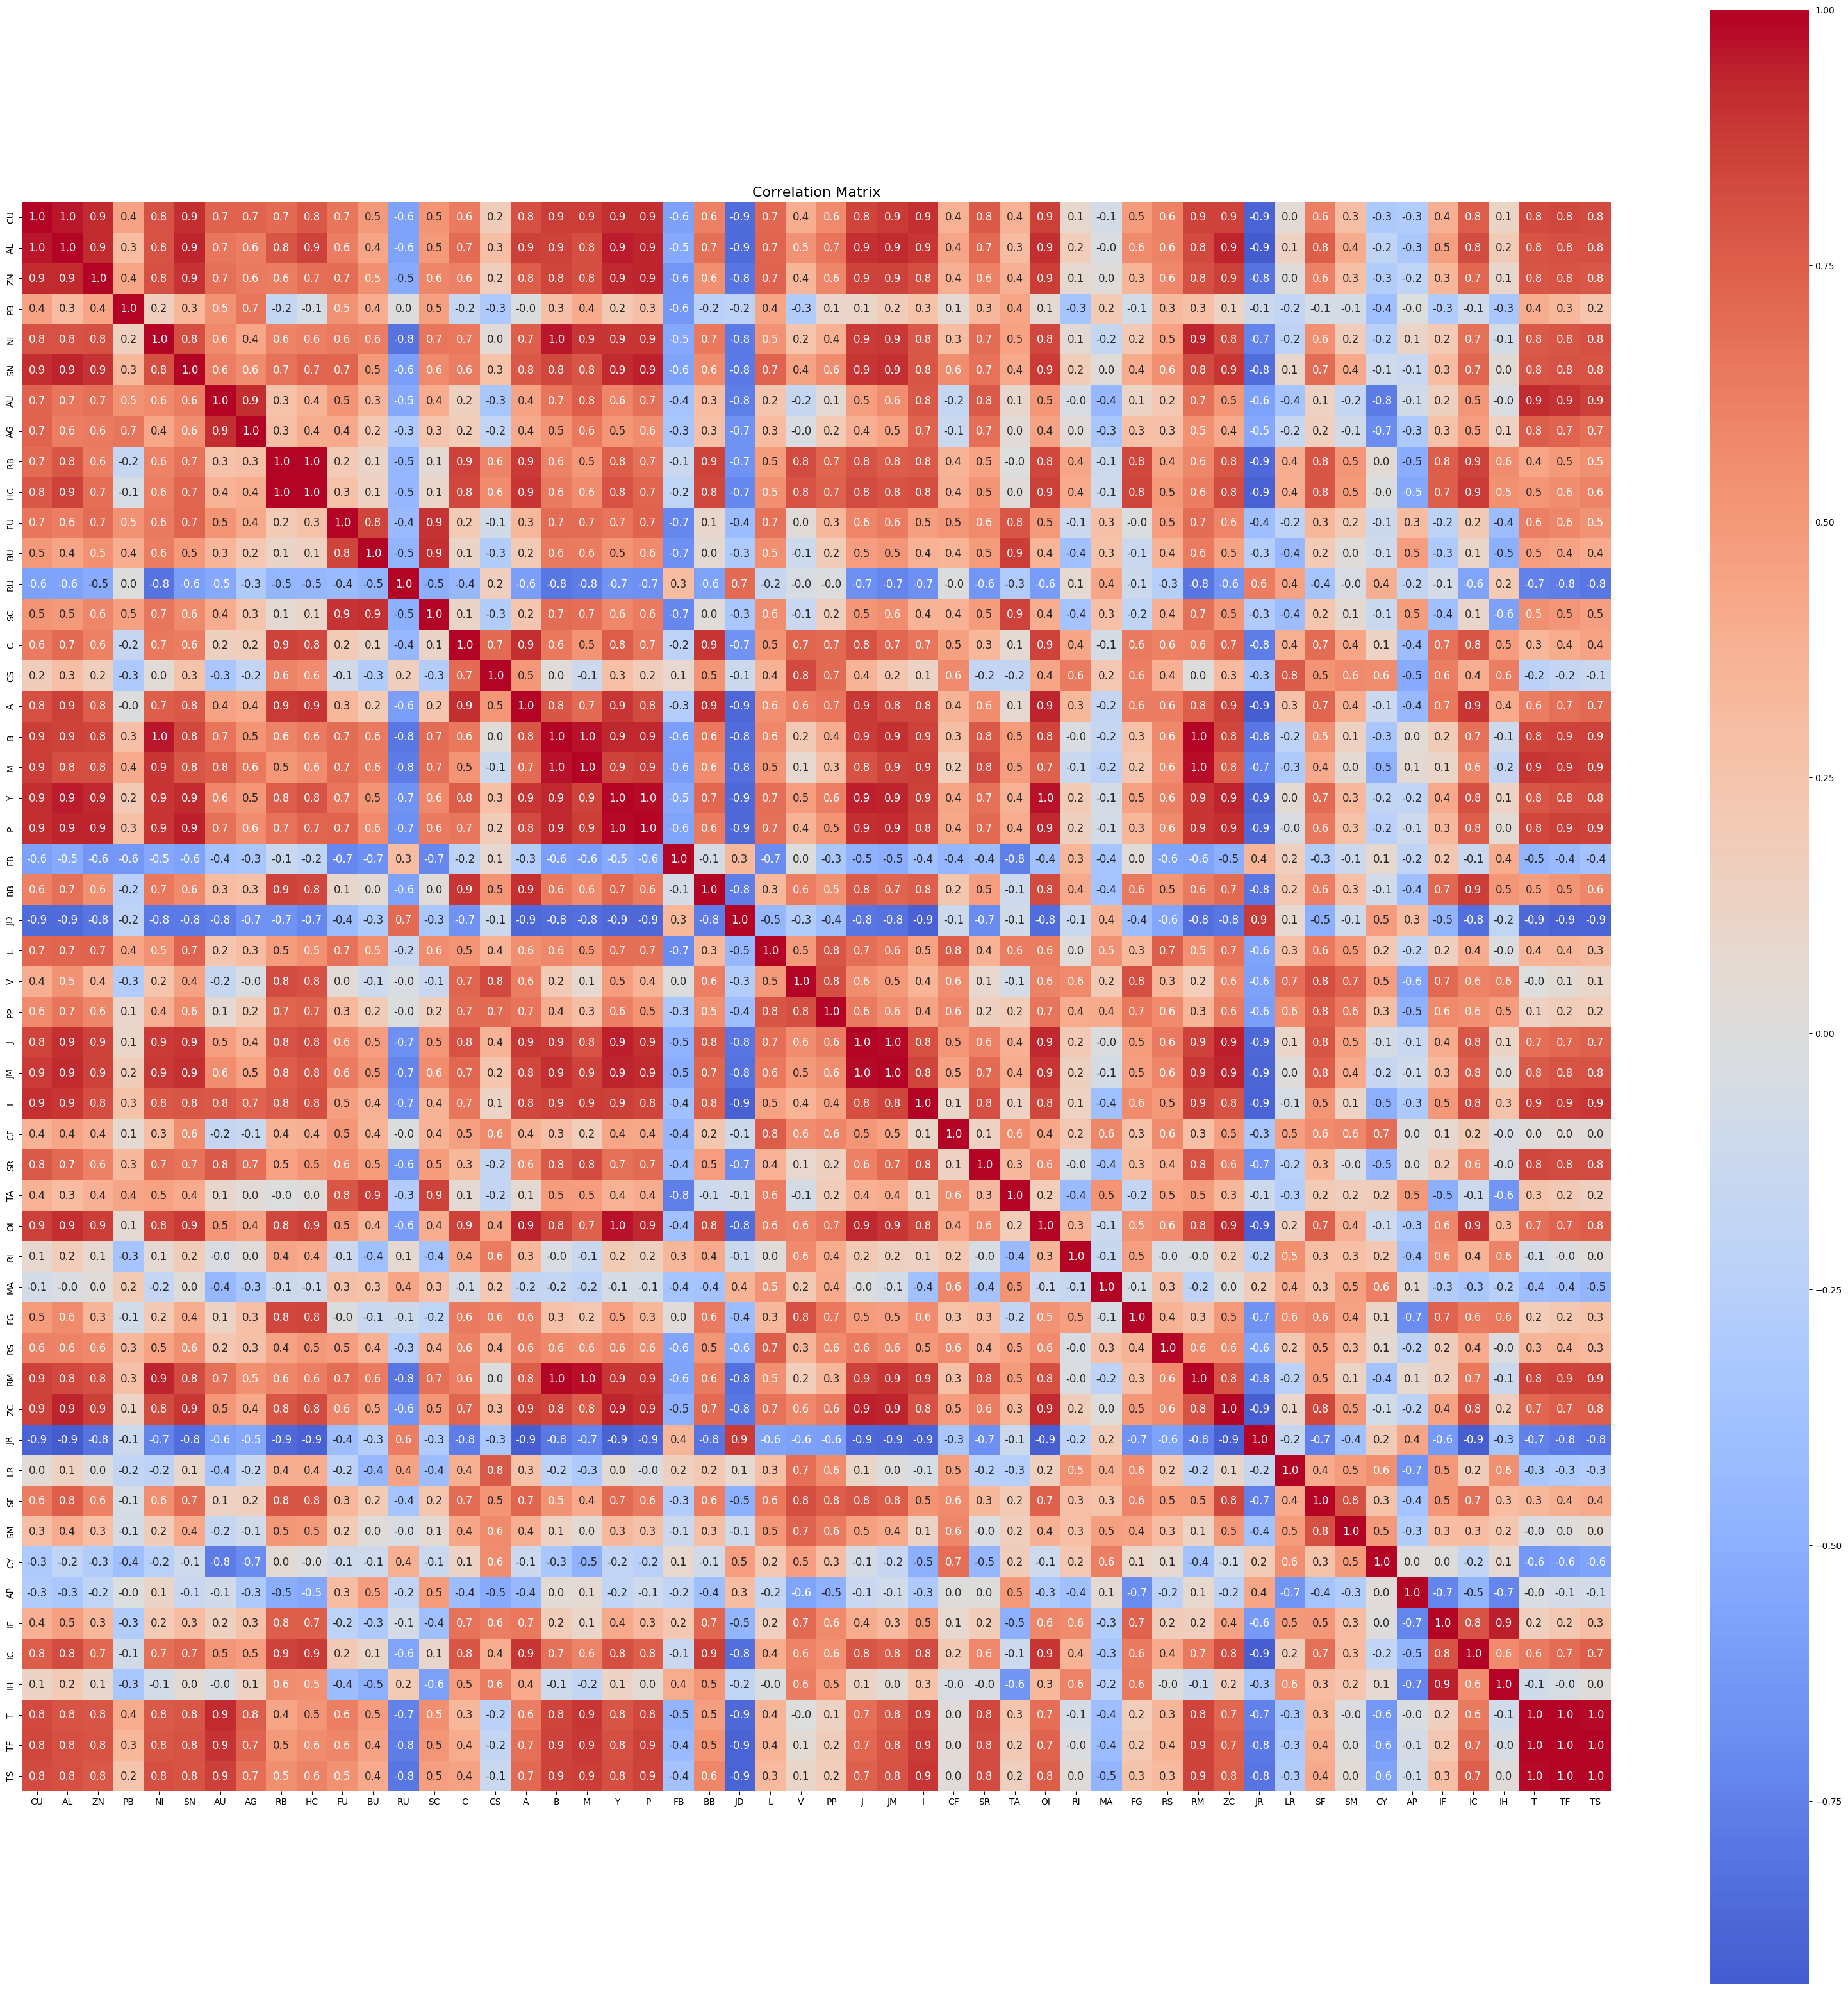

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
correlation = filter_price_df.dropna().corr()

# Rank the correlation data
# 将相关系数矩阵转换为一维数组
corr_values = correlation.unstack()
# 按绝对值大小降序排序
corr_ranked = corr_values.abs().sort_values(ascending=False)
# 去除自身与自身的相关性（对角线元素）
corr_ranked = corr_ranked[corr_ranked.index.get_level_values(0) != corr_ranked.index.get_level_values(1)]

# Plot correlation matrix
plt.figure(figsize=(40, 40))
# 调整字体大小
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0, fmt=".1f", square=True, annot_kws={"size": 12})
plt.title("Correlation Matrix", fontsize=16)
# 添加颜色条标签
plt.colorbar().set_label("Correlation Coefficient", fontsize=14)
plt.tight_layout()
plt.show()